In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
from io import BytesIO
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [26]:
results_df = pd.read_csv("tb_results/test_results.csv")

# Define log params column
results_df['log_params'] = np.log( results_df['params'] )

# Filter only for Kaggle Expanded TB data for internal (it performed better than the reverse)
results_df = results_df[results_df['internal_data'] == 'kaggle_expanded_tb']

# Drop any rows that are all NA
results_df.dropna(how='all', inplace=True)

# Convert Truncated Layers to Int
results_df['truncated_layers'] = results_df['truncated_layers'].apply(lambda x: int(x))

In [27]:
results_df['model_label'] = results_df['truncated_layers'].apply(lambda x: f"B0 (-{x})")


## Internal Accuracy vs Log Params

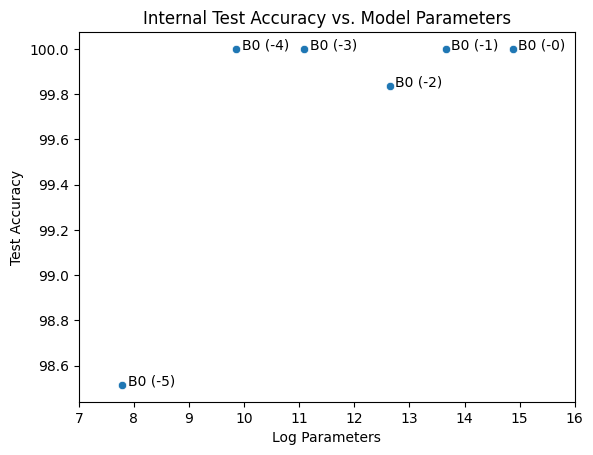

In [28]:
# Plot internal test accuracy by log params
ax1 = sns.scatterplot(x='log_params', y='single_test_acc', data=results_df)

# Add plot labels 
ax1.set_title("Internal Test Accuracy vs. Model Parameters")
ax1.set_ylabel("Test Accuracy")
ax1.set_xlabel("Log Parameters")

ax1.set_xlim([7, 16])

# Define number of rows value for plotting labels
n_row = results_df.shape[0]

for i in range(n_row):
    ax1.text(x=results_df['log_params'][i] + .1, y = results_df['single_test_acc'][i],
              s = results_df['model_label'][i])
    

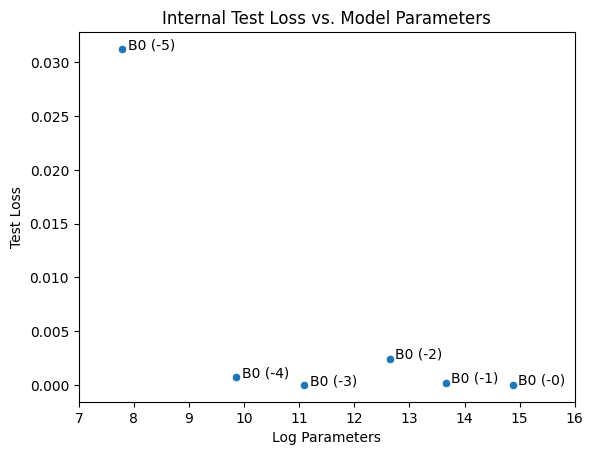

In [29]:
# Plot internal test loss by log params
ax2 = sns.scatterplot(x='log_params', y='single_test_loss', data=results_df)

# Add plot labels 
ax2.set_title("Internal Test Loss vs. Model Parameters")
ax2.set_ylabel("Test Loss")
ax2.set_xlabel("Log Parameters")

ax2.set_xlim([7, 16])

# Define number of rows value for plotting labels
n_row = results_df.shape[0]

for i in range(n_row):
    ax2.text(x=results_df['log_params'][i] + .1, y = results_df['single_test_loss'][i],
              s = results_df['model_label'][i])

## External Accuracy & Loss vs Log Params 

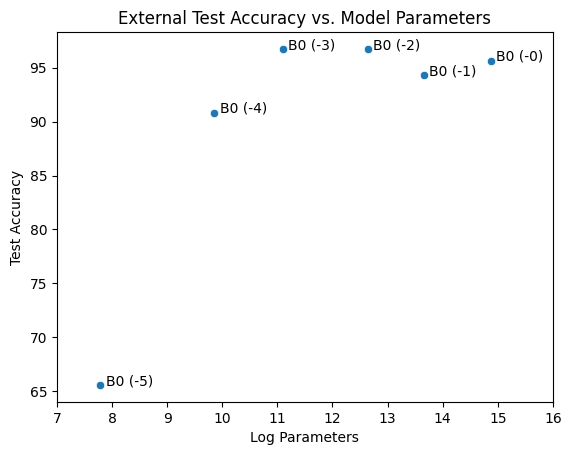

In [30]:
# Plot external test accuracy by log params
ax3 = sns.scatterplot(x='log_params', y='external_test_acc', data=results_df)

# Add plot labels 
ax3.set_title("External Test Accuracy vs. Model Parameters")
ax3.set_ylabel("Test Accuracy")
ax3.set_xlabel("Log Parameters")

ax3.set_xlim([7, 16])

# Define number of rows value for plotting labels
n_row = results_df.shape[0]

for i in range(n_row):
    ax3.text(x=results_df['log_params'][i] + .1, y = results_df['external_test_acc'][i],
              s = results_df['model_label'][i])
    

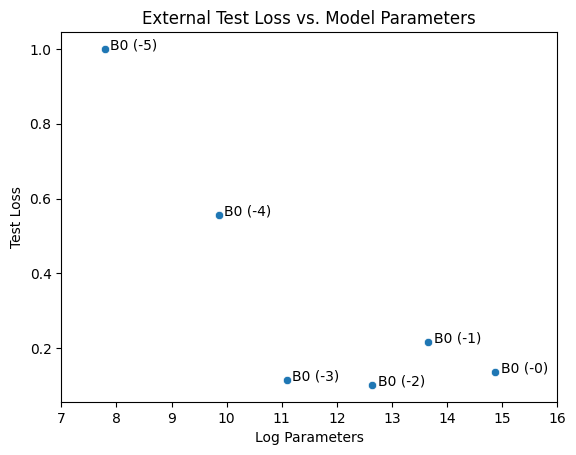

In [31]:
# Plot internal test loss by log params
ax4 = sns.scatterplot(x='log_params', y='external_test_loss', data=results_df)

# Add plot labels 
ax4.set_title("External Test Loss vs. Model Parameters")
ax4.set_ylabel("Test Loss")
ax4.set_xlabel("Log Parameters")

ax4.set_xlim([7, 16])

# Define number of rows value for plotting labels
n_row = results_df.shape[0]

for i in range(n_row):
    ax4.text(x=results_df['log_params'][i] + .1, y = results_df['external_test_loss'][i],
              s = results_df['model_label'][i])

## Truncation vs. Internal Test Acc/Loss Bar Charts 

Text(0.5, 0, 'Truncted Blocks')

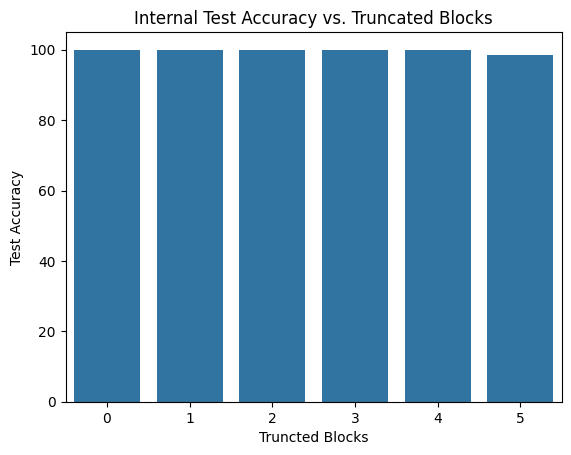

In [32]:
ax5 = sns.barplot(x='truncated_layers', y='single_test_acc', data=results_df)

# Add plot labels 
ax5.set_title("Internal Test Accuracy vs. Truncated Blocks")
ax5.set_ylabel("Test Accuracy")
ax5.set_xlabel("Truncted Blocks")

Text(0.5, 0, 'Truncted Layers')

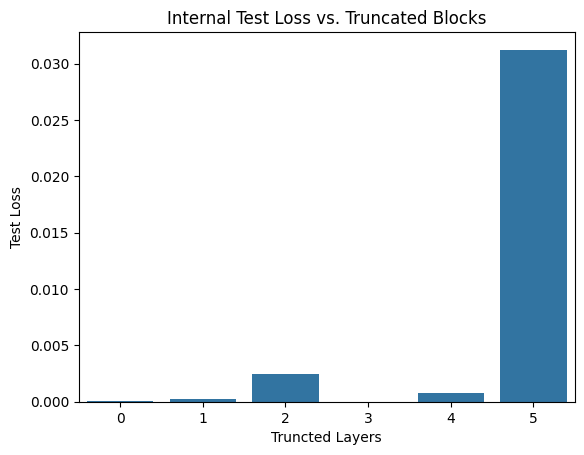

In [33]:
ax6 = sns.barplot(x='truncated_layers', y='single_test_loss', data=results_df)

# Add plot labels 
ax6.set_title("Internal Test Loss vs. Truncated Blocks")
ax6.set_ylabel("Test Loss")
ax6.set_xlabel("Truncted Layers")

## Truncation vs. External Test Acc/Loss Bar Charts 

Text(0.5, 0, 'Truncted Layers')

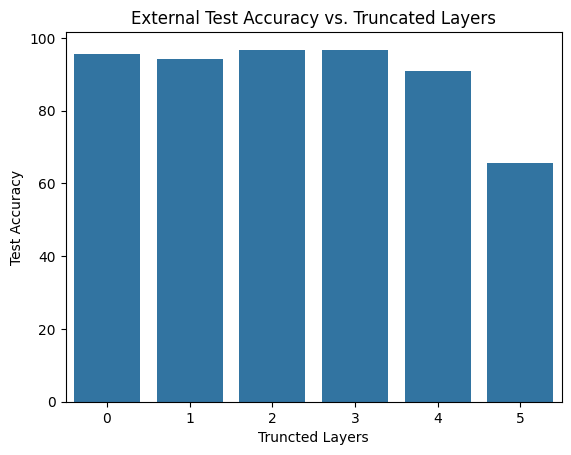

In [34]:
ax7 = sns.barplot(x='truncated_layers', y='external_test_acc', data=results_df)

# Add plot labels 
ax7.set_title("External Test Accuracy vs. Truncated Layers")
ax7.set_ylabel("Test Accuracy")
ax7.set_xlabel("Truncted Layers")

Text(0.5, 0, 'Truncted Blocks')

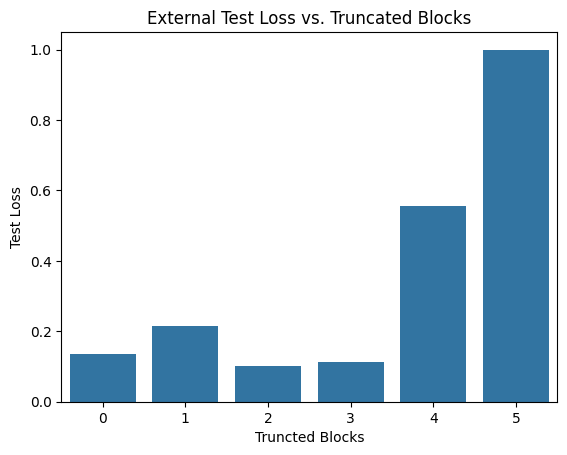

In [35]:
ax8 = sns.barplot(x='truncated_layers', y='external_test_loss', data=results_df)

# Add plot labels 
ax8.set_title("External Test Loss vs. Truncated Blocks")
ax8.set_ylabel("Test Loss")
ax8.set_xlabel("Truncted Blocks")

In [36]:


# Initialize PowerPoint presentation
prs = Presentation()

# Function to save the plot directly to a memory buffer
def save_plot_to_pptx(ax):
    buf = BytesIO()
    canvas = FigureCanvas(ax.figure)  # Create canvas from the figure
    canvas.print_png(buf)  # Save figure as PNG into the buffer
    buf.seek(0)  # Rewind the buffer to the start
    return buf

# Add plots to PowerPoint
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:  # Add your axes here
    slide = prs.slides.add_slide(prs.slide_layouts[6])  # Blank slide layout
    buf = save_plot_to_pptx(ax)  # Get plot from ax
    slide.shapes.add_picture(buf, Inches(1), Inches(1), height=Inches(5.5))  # Add to slide

# Save the PowerPoint file
prs.save('plots_presentation.pptx')
